In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import math
import scipy
import numpy as np
import scipy.stats as st

# Узнаем номера моих задач

In [3]:
from zlib import crc32
import numpy as np

mail = input('\n')
to_hash =  mail.strip().split('@')[0]    
h = crc32(to_hash.encode('utf-8'))
seed = h%(2**32-1)
rs = np.random.RandomState(seed)
task1 = rs.randint(low=1, high=5)
task2 = rs.randint(low=1, high=5)
task3 = rs.randint(low=1, high=5)
task4 = rs.randint(low=1, high=4)
print ('Your tasks are 1.{}, 2.{}, 3.{}, 4.{}'.format(task1, task2, task3, task4))


ugnivenko.va@phystech.edu
Your tasks are 1.1, 2.2, 3.2, 4.3


# Задача 2.2

Рассмотрим фирму, которая занимается продажей лотерейных билетов. 
Правила лотереи следующее: все билеты являются выигрышными с вероятностью p.
Билеты продаются до тех пор, пока хоть один человек не выиграет (гарантируется, что как только билет купили и он выигрышный, больше билетов не продают). Из-за вспышки коронавируса все заводы закрылись, а с ними и знание заветного p также пропало. 
Фирма хочет восстановить p, имея отчет о продажах билетов за последнии 5 месяцев: 8 билетов, 12 билетов, 7 билетов, 6 билетов и 12 билетов.

Требуется:

- Оцените методом максимального правдоподобия параметр p0.


Теперь фирма нашла на складе несколько ящиков из билетами, которые вы можете использовать для проверки гипотезы о том, что истинное p равняется p0 — оценке максимального правдоподобия из предыдущего пункта. Для проверки был предложен следующий эксперимент: последовательно вскрываются n = 100 билетов, и проводился подсчет: сколько выигрышных билетов было из данных N штук. Данный эксперимент проводился 10 раз и были получены следующие результаты: 13, 8, 11, 10, 11, 12, 7, 9, 10, 9.

- записать задачу формально;
- предложить статистику для решения данной задачи;
- получить приближенно нулевое распределение данной статистики;
- записать явно правило принятия решения на основе статистики и нулевого распределения для обеспечения уровня значимости α = 0.05;
- проверить гипотезу по записанному критерию, для данных из условия. Противоречат ли они гипотезу?

## Оценим методом максимального правдоподобия параметр $p_0$.

Пусть случайная величина $\xi$  - выигрышный тест ли нет.

$$\xi \sim Be(p)$$

Пусть случайная величина $\eta$ - количество проданных билетов в месяц. 

$$P(\eta = n) = p\cdot(1-p)^{n-1}$$

Пусть было N месяцев продажи билетов, в которые продали $\{n_i\}_i^N$ билетов. Тогда функция правдоподобия 

$$F(\{n_i\}_i^N) = p^N \cdot(1-p)^{\sum_{i=1}^{N}(n_i -1)} $$

Тогда логарифм функции правдоподобия 

$$L(\{n_i\}_i^N) = N*\ln(p) + \ln(1-p)\cdot({\sum_{i=1}^{N}n_i-N}) $$

Продифиренцируем по p и приравняем к нулю

$$\dfrac{N}{p}-\dfrac{{\sum_{i=1}^{N}n_i-N}}{1-p} = 0$$

Откуда 

$$ p = \dfrac{1}{1+\dfrac{{\sum_{i=1}^{N}n_i-N}}{N} }$$

Или 

$$ p = \dfrac{N}{N+\sum_{i=1}^{N}n_i-N}=\dfrac{N}{\sum_{i=1}^{N}n_i}= \dfrac{1}{\overline{n}}$$

In [4]:
def p_opt(sample):
    return 1/np.mean(sample)

In [19]:
p0 = p_opt([ 5,8, 12, 7, 6, 12])
print(f'ОМП-параметр p0 =', p0 )

ОМП-параметр p0 = 0.12


## Запишем задачу формально и предложим статистику

Пусть теперь случайная величина $\xi$ – количество выигрышных ьилетов в коробке из n = 100 штук. 

Пусть $p$ - вероятность того, что билет выигрышный.

$$\xi \sim Bin(n,p)$$

У нас есть набор $\{\xi_i\}_i^N$, где $\xi_i \sim Bin(n,p)$ 

Тогда $$T(\{\xi_i\}_i^N)=\sum_i^N \xi_i \sim Bin(Nn, p)$$

## Получим приближенно нулевое распределение данной статистики

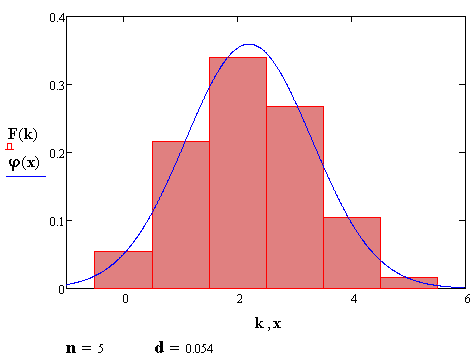

In [17]:
from IPython.display import Image
Image(filename="rt.gif")

Вы уже поняли, к чему я клоню - часто используют асимптотическое выражение для биномиального распределения при условии, что $p$ фиксировано, а $n\rightarrow +\infty$. Теорема Муавра — Лапласа утверждает, что таким асимптотическим выражением для биномиального распределения является нормальная функция.

Условия применимости 

$$n > 100$$
$$n\cdot p\cdot q>10$$

In [20]:
n = 100
N = 10
p = p0
q = 1-p0

In [23]:
print("The first conditional is", n*N > 100)
print("The second conditional is", n*p*q > 10)

The first conditional is True
The second conditional is True


Тогда 

$$P(T = t) \approx \dfrac{1}{\sqrt{2\cdot \pi \cdot N\cdot n \cdot p \cdot q}}\cdot(-\dfrac{(t- N\cdot n\cdot p)^2}{2\sqrt{N\cdot n\cdot p\cdot q}})$$

С тем же успехом можно применить интегральную теорему Муавра — Лапласа, тогда 

$$P(T = t) \approx 2\cdot(1- F_{N_{(0,1)}}(|\dfrac{(t- N\cdot n\cdot p)}{\sqrt{N\cdot n\cdot p\cdot q}}|))$$

## Записать явно правило принятия решения на основе статистики и нулевого распределения для обеспечения уровня значимости α = 0.05

Отклоняем гипотезу $H_0$, если
$$p-value = P(T\geq t| H_0)\leq\alpha = 0.05$$

## Проверить гипотезу по записанному критерию, для данных из условия

In [29]:
sample = [13, 8, 11, 10, 11, 12, 7, 9, 10, 9]

In [35]:
T = (sum(sample) - p0*n*N)/np.sqrt(p0*(1-p0)*n*N)
print("p-value =", 2*(1-st.norm.cdf(np.abs(T))))

p-value = 0.05162503339423852


$$p-value > \alpha = 0.05$$

Значит гипотезу не отвергаем